In [195]:
from sympy import MatrixSymbol, Matrix, Identity
!pip install control
import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Ecuación del movimiento uniformemente acelerado**

$$y = \frac{1}{2}g.t^2+v_0.t+y0$$

In [196]:
t = np.array([0,1,2,3,4])
ym = np.array([0.07,35.096,60.409,75.900,81.609])
vf = np.array([40,30.2,20.4,10.6,0.8])

In [197]:
data_experimento = pd.DataFrame(data = {'t':t,'ym':ym,'vf':vf})
data_experimento 

,t,ym,vf
0,0,0.070,40.0
1,1,35.096,30.2
2,2,60.409,20.4
3,3,75.900,10.6
4,4,81.609,0.8


In [198]:
data = pd.DataFrame(data = {'t':t,'y':ym})
data['ones'] = 1
data

,t,y,ones
0,0,0.070,1
1,1,35.096,1
2,2,60.409,1
3,3,75.900,1
4,4,81.609,1


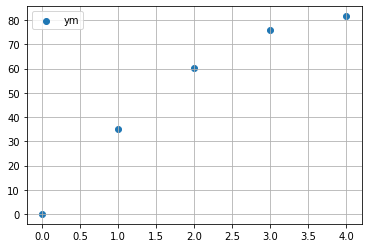

In [199]:
plt.scatter(t,ym, label ='ym')
plt.legend()
plt.grid()

In [200]:
t0 = t**0
t1 = t**1
t2 = t**2
# Calculando la matriz Moore - Penrose
phi = np.array([t0, t1, t2]).transpose()
phi

array([[ 1,  0,  0],
       [ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  4, 16]])

**Matriz W**

**Método de WLS, W**

In [283]:
var = np.var(ym)
#var = np.array([10,10,10,10,10])
#0.0013
_var = var**0.0013
N = 5

W = np.eye(N)*var
_W = np.eye(N)*_var
_W

array([[1.00887985, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.00887985, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.00887985, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.00887985, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.00887985]])

In [215]:
## Vectores "y" y "phi" Normalizados usando W
_y = np.dot(_W,ym)
_phi = np.dot(_W,phi)

In [217]:
## Calculando los estimados THETA
phi_pr = np.dot(_phi.transpose(),_phi)
A = np.linalg.inv(phi_pr)
B = np.dot(phi.transpose(),_y)

## Vector de parámetros estimados
theta = np.dot(A,B)
#theta
#array([ 253.084,  710.05 , 2265.576])
theta

array([ 0.06043478, 39.59545526, -4.8466765 ])

In [218]:
g = theta[2]*(-2)
v = theta[1]
y0 = theta[0]

("gravedad: ",g, "v0: ", v, "y0:", y0)

('gravedad: ',
 9.693353006160983,
 'v0: ',
 39.59545525740613,
 'y0:',
 0.060434776543338196)

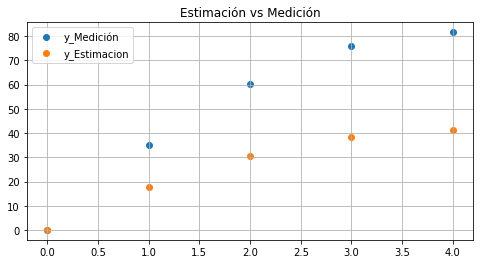

In [208]:
##  Estimación vs Medición
y_e = theta[2]*(t**2)+theta[1]*t+theta[0] 
plt.figure(figsize=(8,4))
plt.title("Estimación vs Medición")
plt.scatter(t,ym, label = "y_Medición")
plt.scatter(t,y_e, label = "y_Estimacion")

plt.legend()
plt.grid()

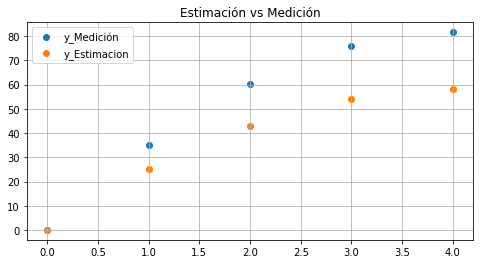

In [213]:
##  Estimación vs Medición
y_e = theta[2]*(t**2)+theta[1]*t+theta[0] 
plt.figure(figsize=(8,4))
plt.title("Estimación vs Medición")
plt.scatter(t,ym, label = "y_Medición")
plt.scatter(t,y_e, label = "y_Estimacion")

plt.legend()
plt.grid()

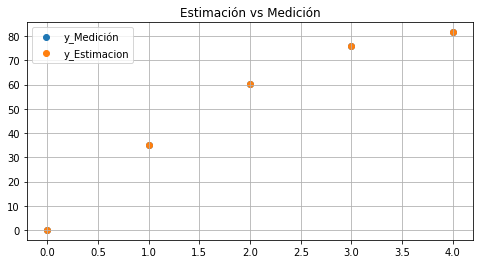

In [232]:
##  Estimación vs Medición
y_e = theta[2]*(t**2)+theta[1]*t+theta[0] 
plt.figure(figsize=(8,4))
plt.title("Estimación vs Medición")
plt.scatter(t,ym, label = "y_Medición")
plt.scatter(t,y_e, label = "y_Estimacion")

plt.legend()
plt.grid()

**Método de mínimos cuadrados regularizados y experimente con el valor de $\alpha$**

In [277]:
## Calculando los estimados THETA
phi_pr = np.dot(phi.transpose(),phi)
A = np.linalg.inv(phi_pr+0.01*np.eye(3))
B = np.dot(phi.transpose(),ym)

## Vector de parámetros estimados
theta = np.dot(A,B)
phi_pr+0.1*np.eye(3)

array([[  5.1,  10. ,  30. ],
       [ 10. ,  30.1, 100. ],
       [ 30. , 100. , 354.1]])

In [278]:
g = theta[2]*(-2)
v = theta[1]
y0 = theta[0]

("gravedad: ",g, "v0: ", v, "y0:", y0)

('gravedad: ',
 9.54825642728069,
 'v0: ',
 39.44600449535765,
 'y0:',
 0.3688226458355603)

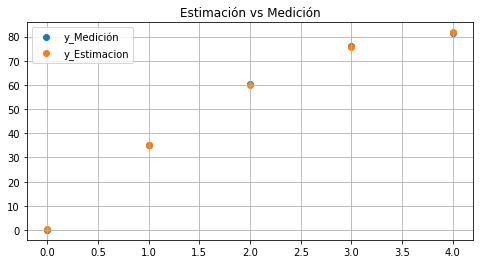

In [279]:
##  Estimación vs Medición
y_e = theta[2]*(t**2)+theta[1]*t+theta[0] 
plt.figure(figsize=(8,4))
plt.title("Estimación vs Medición")
plt.scatter(t,ym, label = "y_Medición")
plt.scatter(t,y_e, label = "y_Estimacion")

plt.legend()
plt.grid()

**Conclusion**

En el método de WLS con W, los pesos se asignaron de formas experimental variando el valor de la varianza del conjunto de 'y'. En cuanto a la observación de que los valores que mejor estimaron los coeficientes fueron los más bajos dentro de un rango de pesos experimentales, esto puede deberse a que asignar pesos demasiado altos a las observaciones con menor varianza puede llevar a sobreponderarlas y, en consecuencia, a subestimar la variabilidad real del modelo. Por lo tanto, es importante encontrar un equilibrio adecuado entre la asignación de pesos que reflejen la variabilidad de los datos y que no sobreponderen las observaciones con menor varianza en exceso.En conclusion se observo que la precisión de los resultados obtenidos depende de la precisión de los pesos W asignados 


En cuanto al experimento variando el valor de $\alpha$, se observo que para este caso en particular, variar el valor de $\alpha$ no alteraba de manera significativa el valor de los coeficientes estimados. Sin embargo, esto no es necesariamente cierto en todos los casos.